In [ ]:

import cv2,numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import preprocess_input

facecascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

img = cv2.imread(r"C:\Users\adith\OneDrive\Pictures\Camera Roll\image.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [63]:


faces = facecascade.detectMultiScale(
    gray,
    scaleFactor=1.3,
    minNeighbors=5
)


In [64]:

if(len(faces)>0):
    x,y,w,h = faces[0]
    faceimg = img[y:y+h,x:x+w]
else:
    faceimg = img.copy()


faceimg = cv2.resize(faceimg,(224,224))
faceimg = preprocess_input(faceimg)
faceimg = np.expand_dims(faceimg,axis=0)

print(faceimg.shape)


(1, 224, 224, 3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9081779e-01 3.6347953e-03 4.8265029e-03 7.2091608e-04]]


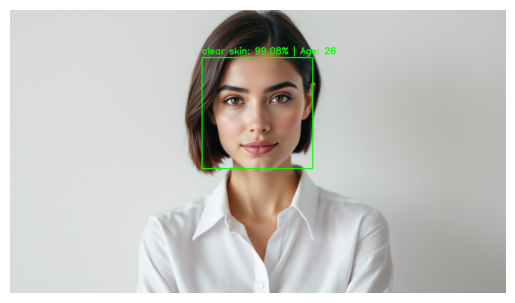

In [ ]:

classnames = ["clear skin","dark spots","puffy eyes","wrinkles"]

model = tf.keras.models.load_model("../models/resnet_best_model.h5")
prediction = model.predict(faceimg)
print(prediction)
predictedindex = prediction.argmax()
confidence = prediction[0][predictedindex] * 100
label = classnames[predictedindex]


def getage(prediction,classnames):
    
    agemap = {
    "clear skin": (18, 30),
    "dark spots": (30, 45),
    "puffy eyes": (45, 60),
    "wrinkles": (60, 100)
    }

    probs = prediction[0]
    maximum = probs.argmax()
    dominantclass = classnames[maximum]

    low, high = agemap[dominantclass]

    return random.randint(low, high)

if(len(faces)>0):
    cv2.putText(
        img,
        f"{label}: {confidence:.2f}% | Age: {getage(prediction,classnames)}",
        (x, y - 10),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.8,
        (0, 255, 0),
        2
    )
    cv2.rectangle(
        img,
        (x, y),
        (x + w, y + h),
        (0, 255, 0),
        2
    )
else:
    cv2.putText(
        img,
        f"{label}: {confidence:.2f}% | Age: {getage(prediction,classnames)}",
        (20, 40),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.5,
        (0, 255, 0),
        2
    )


plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()